## Pulling data directly from kaggle to jupyter notebook

In [83]:
# !pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d  'himanshupoddar/zomato-bangalore-restaurants'
# !unzip zomato-bangalore-restaurants.zip

mkdir: cannot create directory ‘/home/jovyan/.kaggle’: File exists
100%|█████████████████████████████████████▉| 89.0M/89.0M [00:02<00:00, 35.0MB/s]
100%|██████████████████████████████████████| 89.0M/89.0M [00:02<00:00, 38.1MB/s]
Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [6]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline

## Columns description

- url contains the url of the restaurant in the zomato website

- address contains the address of the restaurant in Bengaluru

- name contains the name of the restaurant

- online_order whether online ordering is available in the restaurant or not

- book_table table book option available or not

- rate contains the overall rating of the restaurant out of 5

- votes contains total number of rating for the restaurant as of the above mentioned date

- phone contains the phone number of the restaurant

- location contains the neighborhood in which the restaurant is located

- rest_type restaurant type

- dish_liked dishes people liked in the restaurant

- cuisines food styles, separated by comma

- approx_cost(for two people) contains the approximate cost for meal for two people

- reviews_list list of tuples containing reviews for the restaurant, each tuple

- menu_item contains list of menus available in the restaurant

- listed_in(type) type of meal

- listed_in(city) contains the neighborhood in which the restaurant is listed

In [7]:
zomato_df = pd.read_csv("zomato.csv")

In [8]:
zomato_df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [9]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
zomato_df=zomato_df.rename(columns={"approx_cost(for two people)":"cost"})

In [11]:
zomato_df.shape

(51717, 17)

In [12]:
zomato_df.dtypes

url                object
address            object
name               object
online_order       object
book_table         object
rate               object
votes               int64
phone              object
location           object
rest_type          object
dish_liked         object
cuisines           object
cost               object
reviews_list       object
menu_item          object
listed_in(type)    object
listed_in(city)    object
dtype: object

In [13]:
zomato_df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
zomato_df["cost"]=zomato_df["cost"].astype(str)
zomato_df["cost"]=zomato_df["cost"].apply(lambda x: x.replace(",","")).astype(float)

In [15]:
zomato_df["cost"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost, Length: 51717, dtype: float64

In [16]:
zomato_df_object=zomato_df.select_dtypes(include="object").astype(str)
col=zomato_df_object.columns.to_list()

In [17]:
# for col_name in zomato_df_object.columns.to_list():
#     print(col_name,":",zomato_df_object[zomato_df_object[col_name].apply(lambda x: x.isnumeric())])

In [18]:
zomato_df.duplicated(keep="first").sum()

0

In [19]:
zomato_df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7775
votes                  0
phone               1208
location              21
rest_type            227
dish_liked         28078
cuisines              45
cost                 346
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

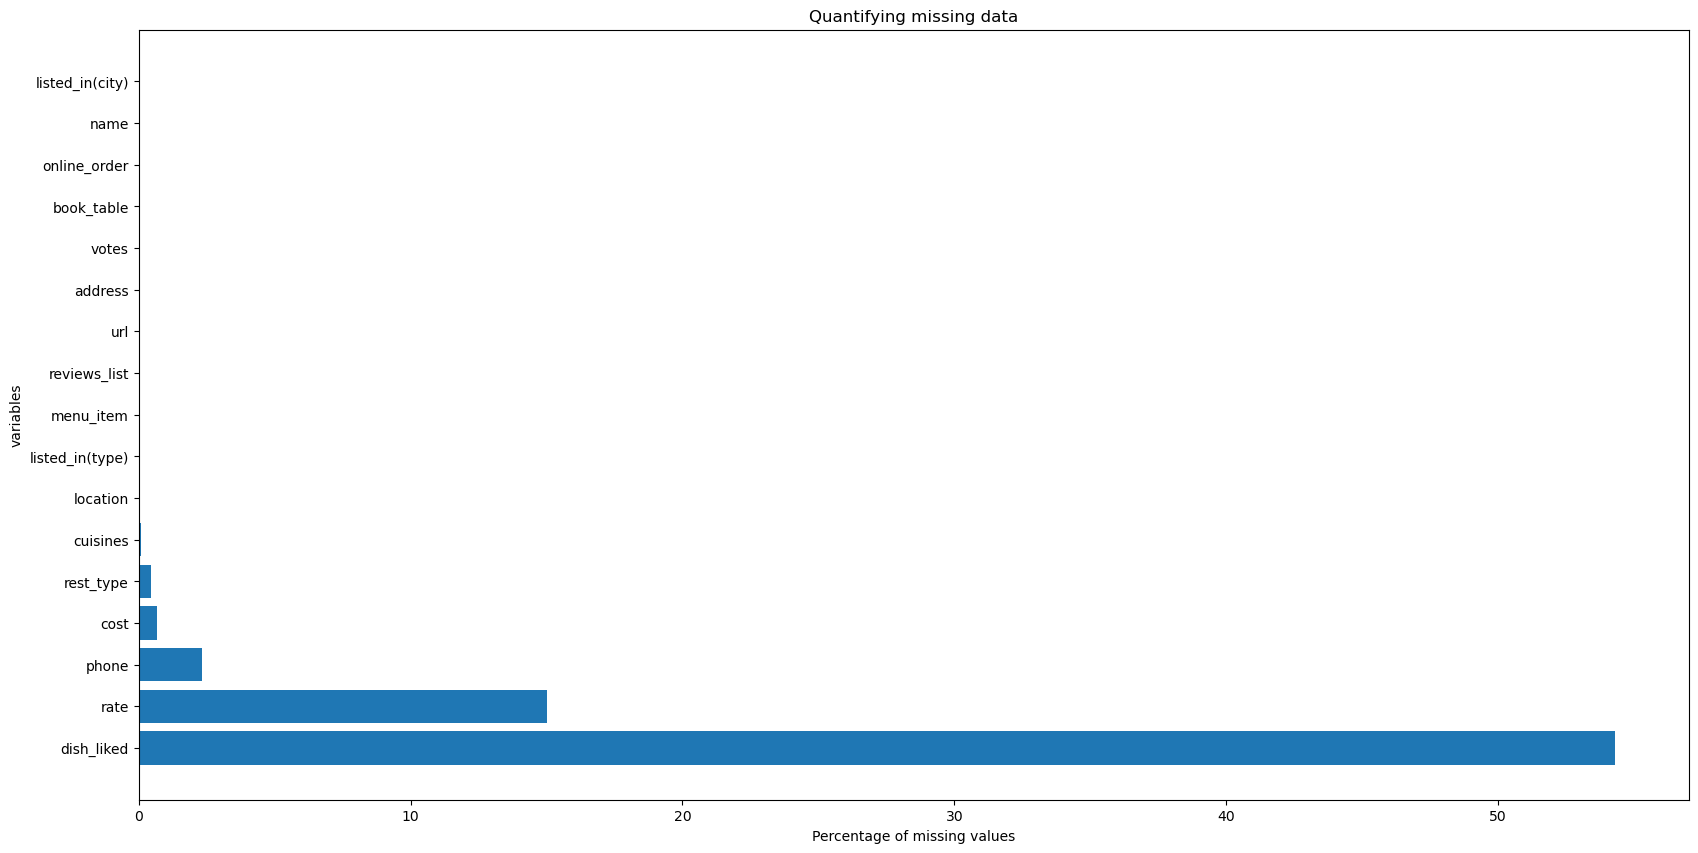

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
missing = zomato_df.isnull().sum().div(zomato_df.shape[0]).mul(100).to_frame().sort_values(by =0, ascending=False)
plt.barh(missing.index, missing.values.T[0])
plt.xlabel('Percentage of missing values')
plt.ylabel("variables")
plt.title('Quantifying missing data');

In [21]:
#Dropping col having missing values more than 50%
def drop_column_50(df):
    percentage_missing = df.isnull().sum().div(df.shape[0]).mul(100)
    col_drop=percentage_missing[percentage_missing.values>50]
    df=df.drop(col_drop.index, axis=1)
    return df.columns

In [22]:
drop_column_50(zomato_df)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
#zomato_df["menu_item"].value_counts(normalize=True)*100

In [24]:
# Dropping menu_item col having >70% of irrelavant datas
zomato_df.drop("menu_item", inplace=True, axis=1 )

In [25]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [29]:
# zomato_df.loc[:, ["location","listed_in(city)"]]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51712,Whitefield,Whitefield
51713,Whitefield,Whitefield
51714,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [30]:
# zomato_df["dish_liked"].value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

## Transforming the rate column 

In [32]:
zomato_df["rate"].value_counts(normalize=True)

NEW       0.050248
3.9/5     0.047745
3.8/5     0.046015
3.7/5     0.045765
3.9 /5    0.042647
            ...   
2.2 /5    0.000159
2.0 /5    0.000159
2.0/5     0.000091
1.8 /5    0.000068
1.8/5     0.000046
Name: rate, Length: 64, dtype: float64

In [33]:
zomato_df["rate"]=zomato_df["rate"].astype(str)
zomato_df["rate"]=zomato_df["rate"].apply(lambda x: x.replace("/5", "")).apply(lambda x: x.strip())
zomato_df["rate"]=zomato_df["rate"].apply(lambda x: x.replace("NEW", str(np.nan)).replace("-", str(np.nan)))
zomato_df["rate"]=zomato_df["rate"].replace("nan", 0.0).astype(float)

In [34]:
#zomato_df["rate"].value_counts()
# zomato_df["rate"].value_counts(normalize=True)

In [35]:
#Extracting the datas from reviews_list col and Transforming the review_list col to ratings 
zomato_df["reviews_list"]=zomato_df["reviews_list"].replace('[]',0.0)
zomato_df["str_reviews_list"]=zomato_df["reviews_list"].apply(lambda x : re.findall(r'Rated *\d+\.\d+', str(x))).apply(lambda x : re.findall(r'\d+\.\d+', str(x)))
zomato_df["str_reviews_list"]

0        [4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...
1        [4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...
2        [3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.0, 4.0, ...
3        [4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.5, ...
4                                               [4.0, 4.0]
                               ...                        
51712    [5.0, 3.5, 2.5, 3.5, 5.0, 5.0, 4.5, 5.0, 5.0, ...
51713                                                   []
51714                                                   []
51715                       [4.0, 1.0, 5.0, 5.0, 5.0, 4.0]
51716                                           [5.0, 5.0]
Name: str_reviews_list, Length: 51717, dtype: object

In [36]:
# df1=zomato_df.query("rate==0.0")[["rate","reviews_list"]]
# df1
# df2=df1[df1["reviews_list"]!=0]
# df2

In [37]:
#Extracting relavat ratings and Averaging
zomato_df["mean_reviews_list"]=zomato_df["str_reviews_list"].apply(lambda x : re.findall(r'\d+\.\d+', str(x))).apply(lambda x: list(map(float,x)))
zomato_df["mean_reviews_list"]=zomato_df["mean_reviews_list"].apply(lambda x : round(np.mean(x),1))
zomato_df["mean_reviews_list"]

0        4.1
1        3.6
2        3.2
3        3.7
4        4.0
        ... 
51712    4.1
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: mean_reviews_list, Length: 51717, dtype: float64

In [38]:
# zomato_df[["mean_reviews_list"]].value_counts().to_frame().sort_values(by="mean_reviews_list",ascending=False)

In [39]:
#Averaging the mean_review_list and rate column to get final rate column
zomato_df["rate"] =round((zomato_df["rate"] + zomato_df["mean_reviews_list"])/2,1)
zomato_df["rate"].value_counts()

4.0    5075
4.2    4694
3.8    4681
3.6    3343
3.4    3022
4.4    2334
3.2    2115
3.9    1951
4.1    1614
3.0    1490
3.7    1325
2.5    1254
2.8    1104
4.3     977
3.5     924
3.3     875
2.0     870
3.1     718
2.6     691
2.4     667
2.9     558
2.2     527
0.5     483
4.6     427
1.5     422
4.5     367
2.7     324
1.8     296
2.3     167
2.1     166
1.0     144
1.2     127
1.9      97
1.6      69
1.4      50
4.8      40
4.7      37
0.8      31
1.7      24
0.9      13
0.6      12
1.1       8
0.7       7
1.3       2
Name: rate, dtype: int64

In [40]:
#Converting ratings 
def ratings(value):
    if (value > 0.0 and value <= 0.5): 
        return 0.0
    elif (value > 0.5 and value <= 1.4): 
        return 1.0
    elif (value > 1.4 and value <= 2.4): 
        return 2.0
    elif (value > 2.4 and value <= 3.4):
        return 3.0
    elif (value > 3.4 and value <= 4.4):
        return 4.0
    else:
        return 5.0

In [41]:
zomato_df["rate"]=zomato_df["rate"].apply(ratings)
zomato_df["rate"].value_counts()

4.0    26918
3.0    12151
5.0     8466
2.0     3305
0.0      483
1.0      394
Name: rate, dtype: int64

<AxesSubplot: xlabel='rate', ylabel='count'>

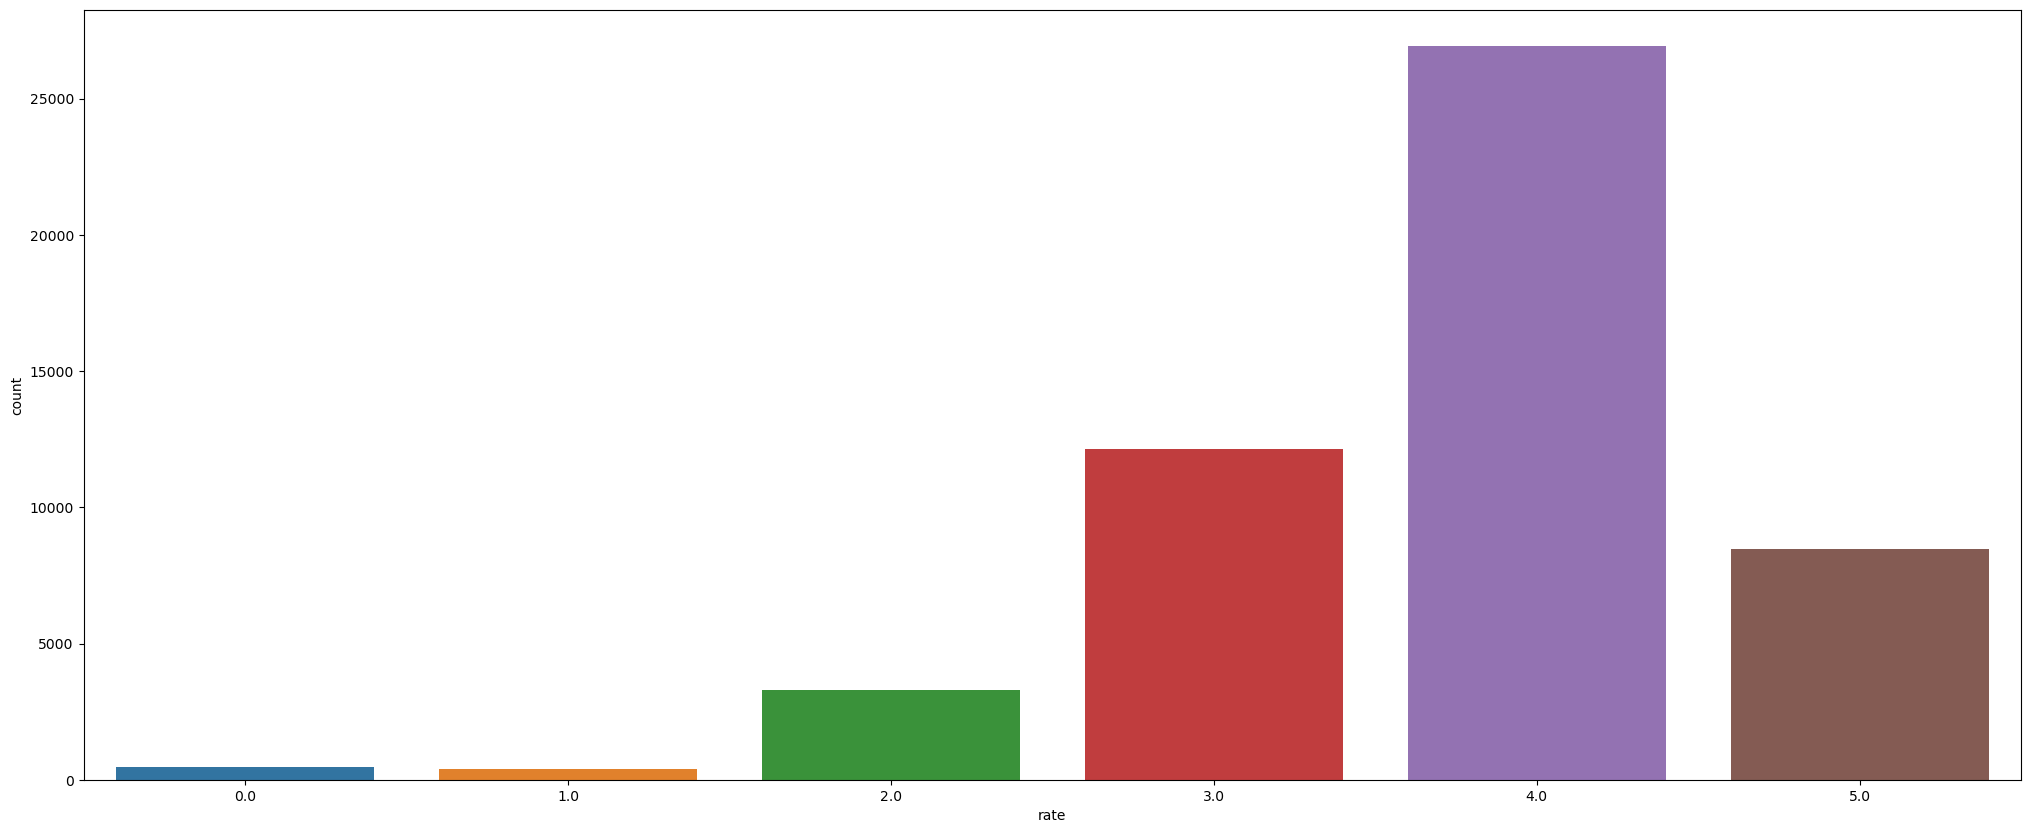

In [42]:
plt.figure(figsize=(25,10))
sns.countplot(data=zomato_df,x=zomato_df["rate"].sort_values(ascending = True))

In [95]:
cols_to_drop ={"drop_columns": ["url", "address", "name", "phone", "location","rest_type","dish_liked", "reviews_list","str_reviews_list","mean_reviews_list" ]}
cols_to_keep={"columns":["online_order", "book_table", "rate", "votes" ,"listed_in(type)", "cuisines", "cost", "listed_in(city)" ]}

In [71]:
# df_catg=df.select_dtypes(include="object")
# catg_col=df_catg.columns.values
    
# df_num=df.select_dtypes(include="number")
# num_col=df_num.columns.values

In [73]:
df=zomato_df.drop(columns=cols_to_drop)
df

,online_order,book_table,rate,votes,cuisines,cost,listed_in(type),listed_in(city)
0,Yes,Yes,4.0,775,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.0,787,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,4.0,918,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,4.0,88,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,4.0,166,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,No,No,4.0,27,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,5.0,0,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,5.0,0,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.0,236,Finger Food,2500.0,Pubs and bars,Whitefield


## Writing columns to keep and drop to yaml file

In [ ]:
import os
def write_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)

        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        with open(file_path, "w") as file:
            yaml.dump(content, file)

    except Exception as e:
        raise e

In [98]:
import yaml
write_yaml_file(file_path="work/schema.yaml", content=cols_to_keep)

In [99]:
import os
def append_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)

        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        with open(file_path, "a") as file:
            yaml.dump(content, file)

    except Exception as e:
        raise e

In [100]:
append_yaml_file(file_path="work/schema.yaml", content=cols_to_drop)

# EDA yet to be completed as we move forward